<a href="https://colab.research.google.com/github/Bakison/bonthe-island1955/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing.image import array_to_img
from IPython.display import display

In [93]:
from numpy.random import seed
seed(888)
tf.random.set_seed(404)

In [94]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()


In [95]:
type(cifar10)

module

In [96]:
from IPython.display import display
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Constants

In [97]:
LABEL_NAMES =['plane','car','Bird','cat','Deer','Dog','Frog','Horse','Ship',"Truck"]
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
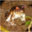

In [98]:
x_train_all[0]

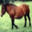

In [99]:
pic = array_to_img(x_train_all[7])
display(pic)

In [100]:
y_train_all.shape

(50000, 1)

In [101]:
y_train_all[7][0]

np.uint8(7)

In [102]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

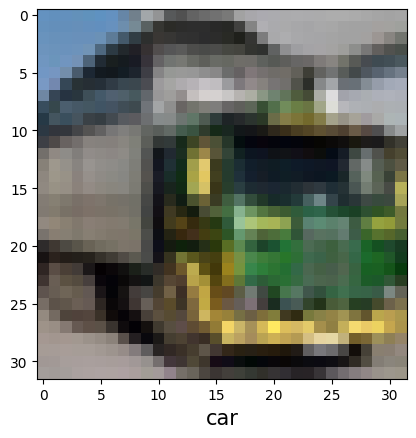

In [103]:
plt.imshow(x_train_all[14])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize = 15)
plt.show()

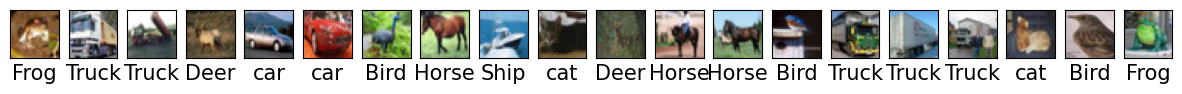

In [104]:
plt.figure(figsize = (15,5))
for i in range(20):
  plt.subplot(1, 20, i+1)
  plt.yticks([])
  plt.xticks([])
  plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize = 15)
  plt.imshow(x_train_all[i])

In [105]:
x_train_all[0].shape

(32, 32, 3)

In [106]:
nr_images, x, y, c = x_train_all.shape
print(f'images={nr_images} \t | width = {x} \t | heighr = {y} \t | channels  = {c}')

images=50000 	 | width = 32 	 | heighr = 32 	 | channels  = 3


In [107]:
x_test.shape

(10000, 32, 32, 3)

Proprocessing the Image DataSet

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
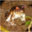

In [108]:
x_train_all[0]

In [109]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [110]:
x_train_all, x_test_all = x_train_all / 255.0, x_test / 255.0

In [111]:
x_train_all[0][0][0][0]

np.float64(0.23137254901960785)

In [112]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [113]:
x_train_all.shape

(50000, 3072)

In [114]:
x_test_all = x_test_all.reshape(x_test_all.shape[0], TOTAL_INPUTS)
print(f'shape of x_test is {x_test.shape}')

shape of x_test is (10000, 32, 32, 3)


CREATE VALIDATION DATASET

In [115]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape
#y_val.shape

(10000, 3072)

In [116]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

In [117]:
y_train.shape

(40000, 1)

Creating a small dataset(For illustration purposes)


In [118]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

**Definding the Neural Network Using Keras**

In [119]:
model_1 =  Sequential([
    Dense(units=128, input_dim = TOTAL_INPUTS, activation='relu', name = 'ml_hidden'),
    Dense(units=64, activation='relu', name = 'm2_hidden'),
    Dense(16, activation= 'relu', name = 'm3_hidden'),
    Dense(10, activation='softmax')
])
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [120]:
type(model_1)

keras.src.models.sequential.Sequential

In [121]:
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ ml_hidden (Dense)               │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m2_hidden (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m3_hidden (Dense)               │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,810 (1.54 MB)

 Trainable params: 402,810 (1.54 MB)

 Non-trainable params: 0 (0.00 B)